# Hands mode data:
in this data set we need to determine the mode that the data was recorder at:
1. Alone: the subject was recorded alone
2. Spontanius: the subject was recorded with another human, but was told to move randomly
3. Sync: the subject was recorded with another human, and was told to move in sync with him.

In [1]:
import pandas as pd
import cv2 as cv
import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from IPython.utils import io

## Playing with the data

We are gonna load random data and try to plot it to see if we can gain some insights

In [2]:
sync = pd.read_csv('data/hands/Training/Shahar Terner/Sachar636771046527112972Sync.csv')
spot = pd.read_csv('data/hands/Training/Shahar Terner/Sachar636771045591258071Spontan.csv')
alone = pd.read_csv('data/hands/Validation/Oded Medina/Oded636754669540564461Alone.csv')
alone_cmp = pd.read_csv('data/hands/HandRight.csv')


In [3]:
alone_cmp[' Hand Type'].value_counts()

right    4738
left       74
Name:  Hand Type, dtype: int64

In [4]:
alone_cmp = alone_cmp.drop(alone_cmp[alone_cmp[' Hand Type'] == "left"].index)

In [5]:
alone_cmp.head()

Time   Frame ID  Hand Type   # hands   Position X   Position Y  \
0  128.2883      15478      right         1     15.67167     226.2064   
1  128.3048      15480      right         1     16.24119     222.9389   
2  128.3218      15482      right         1     16.72461     220.9709   
3  128.3384      15484      right         1     17.09016     219.7124   
4  128.3551      15486      right         1     17.46017     219.3652   

    Position Z   Velocity X   Velocity Y   Velocity Z  ...       Yaw  \
0     20.26470     34.26665  -195.214700   -35.043020  ... -0.277800   
1     20.11781     36.16443  -180.093900    -4.052799  ... -0.277763   
2     19.94972     26.35298   -95.088190   -11.157620  ... -0.278792   
3     19.67679     19.46804   -61.755180   -21.303780  ... -0.279768   
4     19.13128     21.94964    -8.355943   -35.081790  ... -0.278629   

    Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X   Elbow Pos Y  \
0      46.88831      207.3548      86.23589      203.8337      49.33507   
1      47.54861      205.6568      86.42250      203.9553      47.88272   
2      48.15030      204.5182      86.35149      204.6231      45.35921   
3      48.64175      203.9989      86.16056      204.9939      44.18692   
4      48.93135      203.3777      85.59017      204.5952      42.68003   

    Elbow Pos Z   Grab Strenth   Grab Angle   Pinch Strength  
0      237.4553            0.0     0.206389              0.0  
1      238.4482            0.0     0.243050              0.0  
2      236.8544            0.0     0.281134              0.0  
3      236.0927            0.0     0.277691              0.0  
4      235.2896            0.0     0.283008              0.0  

[5 rows x 22 columns]

In [6]:
alone.head()

Time   Frame ID  Hand Type   # hands   Position X   Position Y  \
0  721.9436      45474       left         1    -141.5896     229.9279   
1  721.9774      45475       left         1    -141.5307     229.7787   
2  722.0115      45477       left         1    -141.3911     229.6413   
3  722.0472      45478       left         1    -141.3243     229.5376   
4  722.0778      45479       left         1    -141.2512     229.5567   

    Position Z   Velocity X   Velocity Y   Velocity Z  ...       Yaw  \
0     36.17716     1.000747    -3.657383    -2.084311  ...  0.685566   
1     36.11881     2.370567    -5.999661    -2.346938  ...  0.686339   
2     36.09742     3.334662    -3.034180    -0.422878  ...  0.686755   
3     36.06645     2.680487    -4.166905    -1.243695  ...  0.687251   
4     36.09776     2.943227     0.771668     1.259138  ...  0.687562   

    Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X   Elbow Pos Y  \
0     -181.6649      176.5649      68.87229     -322.9808     -20.41661   
1     -181.6637      176.4594      68.81549     -323.4026     -20.14319   
2     -181.5912      176.3703      68.79632     -324.5771     -19.20103   
3     -181.5477      176.2822      68.76229     -324.7388     -18.97700   
4     -181.5093      176.3425      68.81764     -324.8764     -18.63689   

    Elbow Pos Z   Grab Strenth   Grab Angle   Pinch Strength  
0      171.1481            0.0     0.722829              0.0  
1      171.2350            0.0     0.723772              0.0  
2      171.4565            0.0     0.722777              0.0  
3      171.7301            0.0     0.718312              0.0  
4      172.0705            0.0     0.720262              0.0  

[5 rows x 22 columns]

We need out `Time` colums to be equal on both of out hands, but because in the alone mode we only have one hand, and the `HandRight.csv` times do not match, we copy the `Time` from out original file

In [7]:
alone_cmp['Time'] = alone_cmp['Time'] + (alone.iloc[0,0] - alone_cmp.iloc[0,0])
alone_cmp.head()

Time   Frame ID  Hand Type   # hands   Position X   Position Y  \
0  721.9436      15478      right         1     15.67167     226.2064   
1  721.9601      15480      right         1     16.24119     222.9389   
2  721.9771      15482      right         1     16.72461     220.9709   
3  721.9937      15484      right         1     17.09016     219.7124   
4  722.0104      15486      right         1     17.46017     219.3652   

    Position Z   Velocity X   Velocity Y   Velocity Z  ...       Yaw  \
0     20.26470     34.26665  -195.214700   -35.043020  ... -0.277800   
1     20.11781     36.16443  -180.093900    -4.052799  ... -0.277763   
2     19.94972     26.35298   -95.088190   -11.157620  ... -0.278792   
3     19.67679     19.46804   -61.755180   -21.303780  ... -0.279768   
4     19.13128     21.94964    -8.355943   -35.081790  ... -0.278629   

    Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X   Elbow Pos Y  \
0      46.88831      207.3548      86.23589      203.8337      49.33507   
1      47.54861      205.6568      86.42250      203.9553      47.88272   
2      48.15030      204.5182      86.35149      204.6231      45.35921   
3      48.64175      203.9989      86.16056      204.9939      44.18692   
4      48.93135      203.3777      85.59017      204.5952      42.68003   

    Elbow Pos Z   Grab Strenth   Grab Angle   Pinch Strength  
0      237.4553            0.0     0.206389              0.0  
1      238.4482            0.0     0.243050              0.0  
2      236.8544            0.0     0.281134              0.0  
3      236.0927            0.0     0.277691              0.0  
4      235.2896            0.0     0.283008              0.0  

[5 rows x 22 columns]

Change the index to the `Time` column so we can plot it acoording to the time

In [8]:
sync = sync.set_index('Time')
spot = spot.set_index('Time')
alone = alone.set_index('Time')
alone_cmp = alone_cmp.set_index('Time')

In [9]:
sync.describe()

Frame ID      # hands   Position X   Position Y   Position Z  \
count   9046.000000  9046.000000  9046.000000  9046.000000  9046.000000   
mean   61443.269954     1.999116    -8.303831   205.153307    29.692022   
std     2494.087862     0.029727   114.076689    39.633510    29.226010   
min    57122.000000     1.000000  -232.583500    95.871930   -86.975040   
25%    59284.500000     2.000000  -109.356550   179.866825    14.738917   
50%    61445.000000     2.000000   -12.148210   204.027550    32.707705   
75%    63602.750000     2.000000    97.852667   228.541900    47.597293   
max    65759.000000     2.000000   231.685000   345.954600   108.593800   

        Velocity X   Velocity Y   Velocity Z        Pitch         Roll  \
count  9046.000000  9046.000000  9046.000000  9046.000000  9046.000000   
mean     -0.258121    -0.687626     0.732390     1.302094     0.231522   
std     112.007500   105.639924    84.791598     0.406509     1.356114   
min    -522.291900  -936.715800  -604.876000     0.028502    -2.993421   
25%     -55.560432   -54.158552   -37.307492     1.098461    -1.101727   
50%      -2.167702     1.517804    -1.103987     1.355069    -0.290490   
75%      55.678945    57.430475    37.717388     1.595150     1.570480   
max     987.333000   695.924800   540.058200     2.321273     3.106793   

               Yaw   Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X  \
count  9046.000000   9046.000000   9046.000000   9046.000000   9046.000000   
mean     -0.411449      5.073159    148.374353     36.942437     26.289437   
std       1.393457    137.431949     40.076469     22.010824    285.808342   
min      -3.140609   -235.378900     41.043330    -38.334400   -400.466000   
25%      -1.292490   -122.879800    123.924300     24.876653   -253.124300   
50%      -0.743953     18.912010    147.196300     37.902940    193.307900   
75%       0.378623    139.920700    172.974625     48.259473    311.208225   
max       3.141453    274.867000    282.715400    146.509600    422.735900   

        Elbow Pos Y   Elbow Pos Z   Grab Strenth   Grab Angle   Pinch Strength  
count   9046.000000   9046.000000    9046.000000  9046.000000      9046.000000  
mean     -35.685580     66.189130       0.071603     0.460350         0.057312  
std       58.315204     44.493832       0.220393     0.791437         0.188010  
min     -186.772400    -59.390530       0.000000     0.000000         0.000000  
25%      -78.672092     35.056368       0.000000     0.000000         0.000000  
50%      -31.166265     68.548995       0.000000     0.044963         0.000000  
75%        4.347710     93.500363       0.000000     0.512012         0.000000  
max      163.435600    210.481400       1.000000     3.141593         1.000000

In [10]:
sync.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9046 entries, 473.3199 to 548.3006
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0    Frame ID        9046 non-null   int64  
 1    Hand Type       9046 non-null   object 
 2    # hands         9046 non-null   int64  
 3    Position X      9046 non-null   float64
 4    Position Y      9046 non-null   float64
 5    Position Z      9046 non-null   float64
 6    Velocity X      9046 non-null   float64
 7    Velocity Y      9046 non-null   float64
 8    Velocity Z      9046 non-null   float64
 9    Pitch           9046 non-null   float64
 10   Roll            9046 non-null   float64
 11   Yaw             9046 non-null   float64
 12   Wrist Pos X     9046 non-null   float64
 13   Wrist Pos Y     9046 non-null   float64
 14   Wrist Pos Z     9046 non-null   float64
 15   Elbow pos X     9046 non-null   float64
 16   Elbow Pos Y     9046 non-null   float64
 17   

In [11]:
sync.head()

Frame ID  Hand Type   # hands   Position X   Position Y  \
Time                                                                 
473.3199      57122      right         2     122.5620     218.3500   
473.3199      57122       left         2    -127.4118     201.7256   
473.3364      57124      right         2     122.6436     220.4657   
473.3364      57124       left         2    -127.6337     203.2215   
473.3530      57126      right         2     122.5734     222.8511   

           Position Z   Velocity X   Velocity Y   Velocity Z     Pitch  ...  \
Time                                                                    ...   
473.3199    -31.88206    19.886130     75.80657     65.97881  0.617926  ...   
473.3199    -10.88737   -16.198040    108.11870     41.10345  0.484390  ...   
473.3364    -30.86330    -0.449261    121.86500     63.31036  0.672810  ...   
473.3364     -9.95556   -19.241040     90.65759     51.81181  0.508929  ...   
473.3530    -29.92606    -7.838688    126.03910     51.80624  0.722643  ...   

               Yaw   Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X  \
Time                                                                         
473.3199 -0.440404      154.1254      174.5538      12.09824      310.6552   
473.3199  0.241881     -143.8172      160.5733      41.88228     -301.3908   
473.3364 -0.435520      153.1742      174.1515      11.24345      305.8892   
473.3364  0.224138     -142.9792      160.6243      42.04107     -296.4537   
473.3530 -0.436253      152.2634      174.3460      10.30312      298.7614   

           Elbow Pos Y   Elbow Pos Z   Grab Strenth   Grab Angle  \
Time                                                               
473.3199      8.973523     106.50380            0.0     0.145420   
473.3199     -6.086051     132.57990            0.0     0.156763   
473.3364      3.519703     102.86100            0.0     0.119546   
473.3364     -9.288877     133.72500            0.0     0.181778   
473.3530     -2.771122      99.73855            0.0     0.112040   

           Pinch Strength  
Time                       
473.3199              0.0  
473.3199              0.0  
473.3364              0.0  
473.3364              0.0  
473.3530              0.0  

[5 rows x 21 columns]

Now we split the hands

In [12]:
left_s = sync[sync[' Hand Type'] == 'left']
right_s = sync[sync[' Hand Type'] == 'right']

left_sp = spot[spot[' Hand Type'] == 'left']
right_sp = spot[spot[' Hand Type'] == 'right']

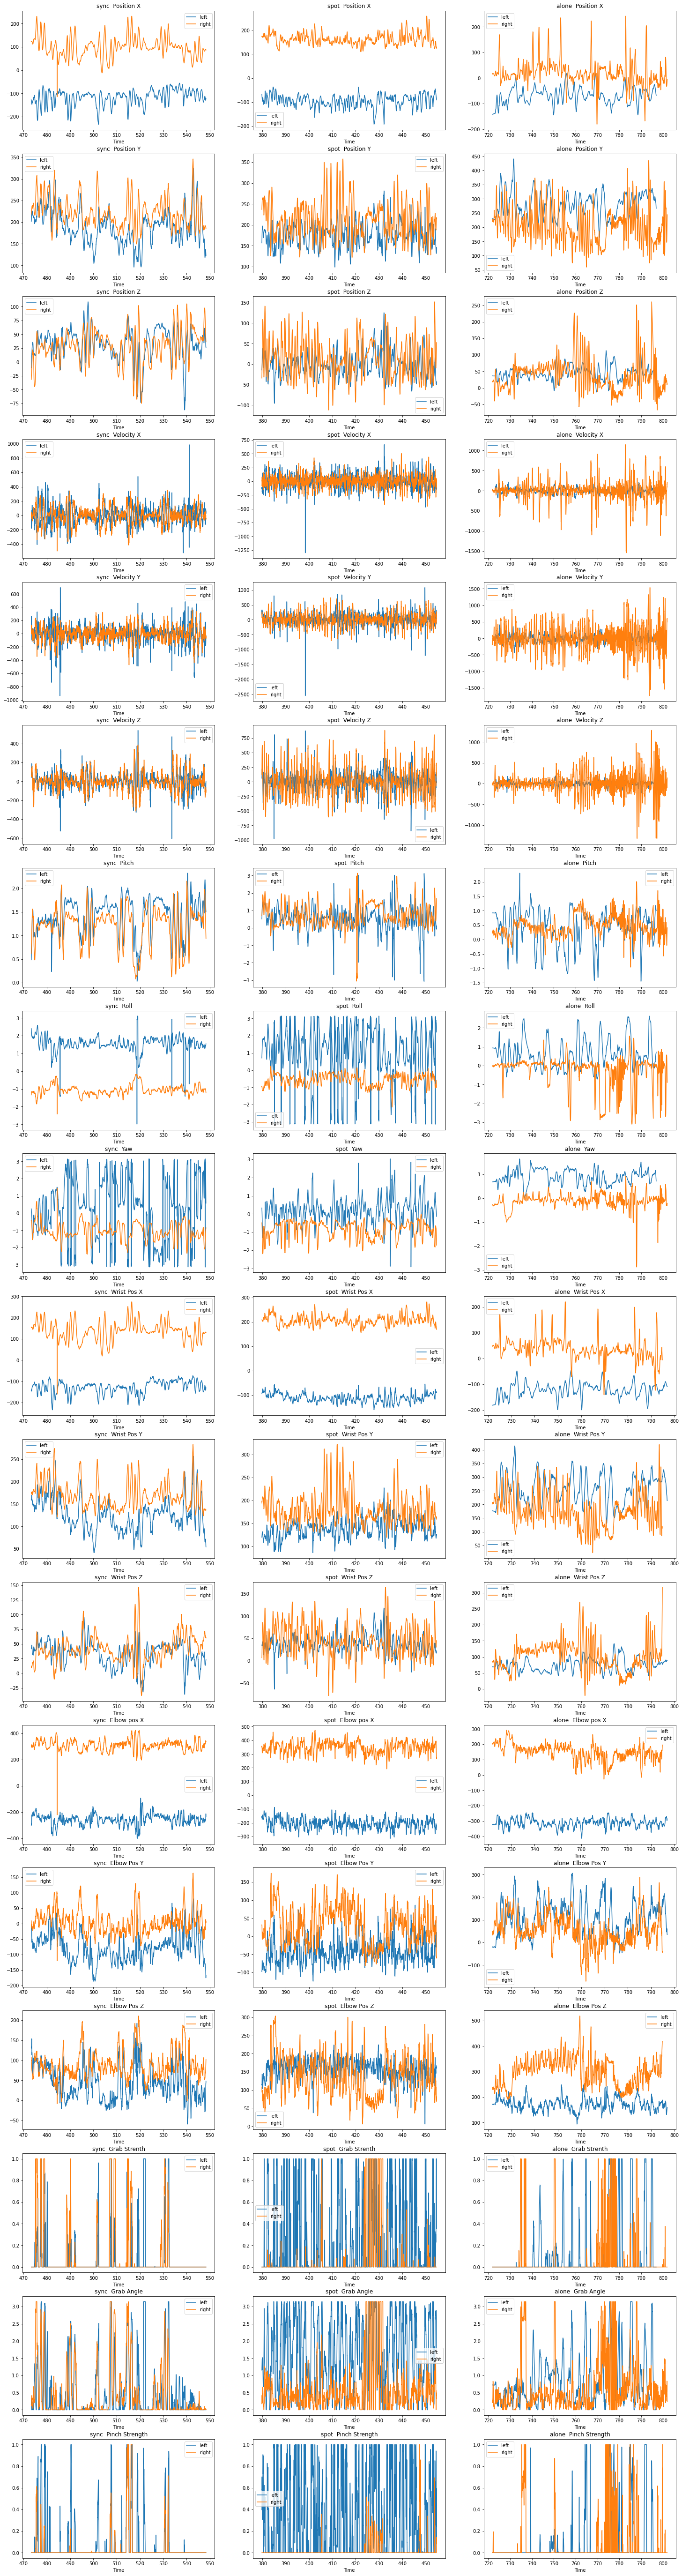

In [13]:
plt.figure()
i = 1
for x in range(1,54 ,3):
    plt.subplot(18,3,x)
    left_s.iloc[:,i+2].plot(figsize=(25,100),label='left')
    right_s.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("sync {}".format(left_s.columns[i+2]))
    plt.legend()

    plt.subplot(18,3,x + 1)
    left_sp.iloc[:,i+2].plot(figsize=(25,100),label='left')
    right_sp.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("spot {}".format(left_s.columns[i+2]))
    plt.legend()
    
    plt.subplot(18,3,x + 2)
    alone.iloc[:,i+2].plot(figsize=(25,100),label='left')
    alone_cmp.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("alone {}".format(left_s.columns[i+2]))
    plt.legend()

    i = i + 1
plt.show()



So just by looking at the graph we can see some big diffarnces:
We can see that the diffarnce in the `X Position` between both hand is bigger in the spotntan mode.

## Loading the data

Loading the data consists of three parts:<br>
1. joinig the right hand with the alone mode:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;coping the `Time` and `Frame ID` from the alone mode to the right hand data,merging it, and sorting it with stable sort by `Hand type` and then `Time`, this will give use simmilar lokking data to the Spot/Sync modes,except for a few rows,and that is becuase not file are the same lenght, So we will only take the amount of rows that we know conating both hands(disclaimer: I know that by taking twice the amount of the `RightHand` size we are losing a lot of data but this in negligible)
2. proccesing the data:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;instead of using the original featuers, we are going to use the differnce between the hands. So we subtract the right hand valuse from the left hand values. After that we combine every 120 frames (about 3 seconds) and take the maximux value 
3. joining all of the data drames toghther

<ol>

In [14]:
right_hand = pd.read_csv('data/hands/HandRight.csv') 

right_hand[" Hand Type"] = "right"
right_hand = right_hand.drop(right_hand[right_hand[' Hand Type'] == "left"].index)
right_hand = right_hand.dropna()

def join_right_hand(df):
    df = df.drop(df[df[' Hand Type'] == "right"].index)
    df = df.dropna()

    right_hand['Time'] = df['Time']
    right_hand[' Frame ID'] = df[[' Frame ID']]

    frames = [df,right_hand]
    df = pd.concat(frames)

    df = df.sort_values(' Hand Type').sort_values('Time',kind='stable')
    x = df[' Hand Type'].value_counts()
    df = df.reset_index().iloc[:x.iloc[1] * 2]
    
    df[" # hands"] = 2

    return df

In [15]:
def proccess_df(df):
    df = df.drop(df[df[" # hands"] == 1].index)
    df = df.iloc[7*60 *2 :,:] # clear the first 7 seconds
    df = df.drop_duplicates()
    left = df[df[' Hand Type'] == 'left'].reset_index()
    right = df[df[' Hand Type'] == 'right'].reset_index()

    ret = pd.DataFrame({
        'diff_pos_x': [],
        'diff_pos_y': [],
        'diff_pos_z': [],
        'vel_x_l': [],
        'vel_x_l': [],
        'vel_y_l': [],
        'vel_y_r': [],
        'diff_wr_pos_x': [],
        'diff_wr_pos_y': [],
        'diff_wr_pos_z': [],
        'diff_grab_str': []
    })



    ret['diff_pos_x'] = (left[' Position X'] - right[' Position X'])
    ret['diff_pos_y'] = (left[' Position Y'] - right[' Position Y'])
    ret['diff_pos_z'] = (left[' Position Z'] - right[' Position Z'])
    ret['vel_x_l'] = left[' Velocity X']
    ret['vel_x_r'] = right[' Velocity X']
    ret['vel_y_l'] = left[' Velocity Y']
    ret['vel_y_r'] = right[' Velocity Y']
    ret['diff_wr_pos_x'] = (left[' Wrist Pos X'] - right[' Wrist Pos X'])
    ret['diff_wr_pos_y'] = (left[' Wrist Pos Y'] - right[' Wrist Pos Y'])
    ret['diff_wr_pos_z'] = (left[' Wrist Pos Z'] - right[' Wrist Pos Z'])
    ret['diff_grab_str'] = (left[' Grab Strenth'] - right[' Grab Strenth'])

    df = ret.groupby(np.arange(len(ret.index))//120, axis=0).max()
    
    return df.dropna()

In [16]:
def load_data(path):
    li = []

    for subject in os.listdir(path):
        for file in os.listdir(path + '/' + subject):
            df = pd.read_csv(path + '/' + subject + '/' + file)
            if "Alone" in file:
                df = join_right_hand(df)
                df = proccess_df(df)
                df['OUTCOME'] = 0
            elif "Spon" in file:
                df = proccess_df(df)
                df['OUTCOME'] = 1
            else:
                df = proccess_df(df)
                df['OUTCOME'] = 2
            li.append(df)
    df = pd.concat(li,ignore_index=True)
    return df

In [17]:
df = load_data('data/hands/Training')
df_test = load_data('data/hands/Validation')

In [18]:
df.head()

diff_pos_x  diff_pos_y  diff_pos_z   vel_x_l   vel_y_l   vel_y_r  \
0  -184.66621     17.8049    6.508924  301.8577  269.2947  344.3376   
1  -222.25094     59.1738   49.601420  133.1215  607.1642  359.4510   
2  -216.03260     43.2397   60.801310  212.2680  382.1888  276.4603   
3  -254.37594     44.1949   75.679140  287.3178  280.0533  335.7638   
4  -217.79846     41.1695   39.652753  171.2412  346.9084  565.6714   

   diff_wr_pos_x  diff_wr_pos_y  diff_wr_pos_z  diff_grab_str   vel_x_r  \
0     -242.54597       -17.6655       2.656426       0.936631  257.6796   
1     -253.48320        20.1817      34.026370       1.000000  116.2182   
2     -274.72393         1.5311      38.264515       1.000000  193.6745   
3     -294.99850         8.0147      56.444296       1.000000  107.0673   
4     -287.49140       -14.9869      30.742950       1.000000  326.6910   

   OUTCOME  
0        1  
1        1  
2        1  
3        1  
4        1

In [19]:
df["OUTCOME"].value_counts()

1    510
2    506
0    461
Name: OUTCOME, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('OUTCOME',axis=1)
Y = df['OUTCOME']
x_test = df_test.drop('OUTCOME',axis=1)
y_test = df_test['OUTCOME']


x_train,x_validate,y_train,y_validate = train_test_split(X,Y,test_size = 0.05,random_state=42)

## Machine learning

We are going to use some simple (and some more complex) ML algorithms to try to get the best possible acuraccy.
then using ensambling algorithm we will combine or try to improve our basic algorithms.

In [21]:
x_axis = ["knn","Linear \n Regression","Random \n Forest","Gaussian NB","adaboost","xgboost"]
y_axis = []

### Basic algorithms:

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn =  KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

knn.fit(x_train,y_train)
score = knn.score(x_validate,y_validate)
y_axis.append(score)
print("knn:{}".format(score))

knn:0.7297297297297297


In [23]:
from sklearn.linear_model import LinearRegression

lr =  LinearRegression()

lr.fit(x_train,y_train)
score = lr.score(x_validate,y_validate)
y_axis.append(score)
print("lr:{}".format(score))


lr:0.6279716909566617


In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
score = rfc.score(x_validate,y_validate)
y_axis.append(score)
print("random forest :{}".format(score))


random forest :0.8783783783783784


In [25]:
from sklearn.naive_bayes import GaussianNB


gnb_clf =  GaussianNB()

gnb_clf.fit(x_train,y_train)
score = gnb_clf.score(x_validate,y_validate)
y_axis.append(score)
print("gaussian nayive bayas:{}".format(score))

gaussian nayive bayas:0.7837837837837838


### more complex algorithms:

In [26]:
from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier(n_estimators=90,learning_rate=1.1)
ada.fit(x_train,y_train)
score = ada.score(x_validate,y_validate)
y_axis.append(score)
print("adaboost:{}".format(score))

adaboost:0.7027027027027027


In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000,eta=0.35,max_depth=6, eval_metric='mlogloss')
xgb.fit(x_train,y_train)
score = xgb.score(x_validate,y_validate)
y_axis.append(score)
print("XGBoost:{}".format(score))


XGBoost:0.8378378378378378


[0.7297297297297297, 0.6279716909566617, 0.8783783783783784, 0.7837837837837838, 0.7027027027027027, 0.8378378378378378]


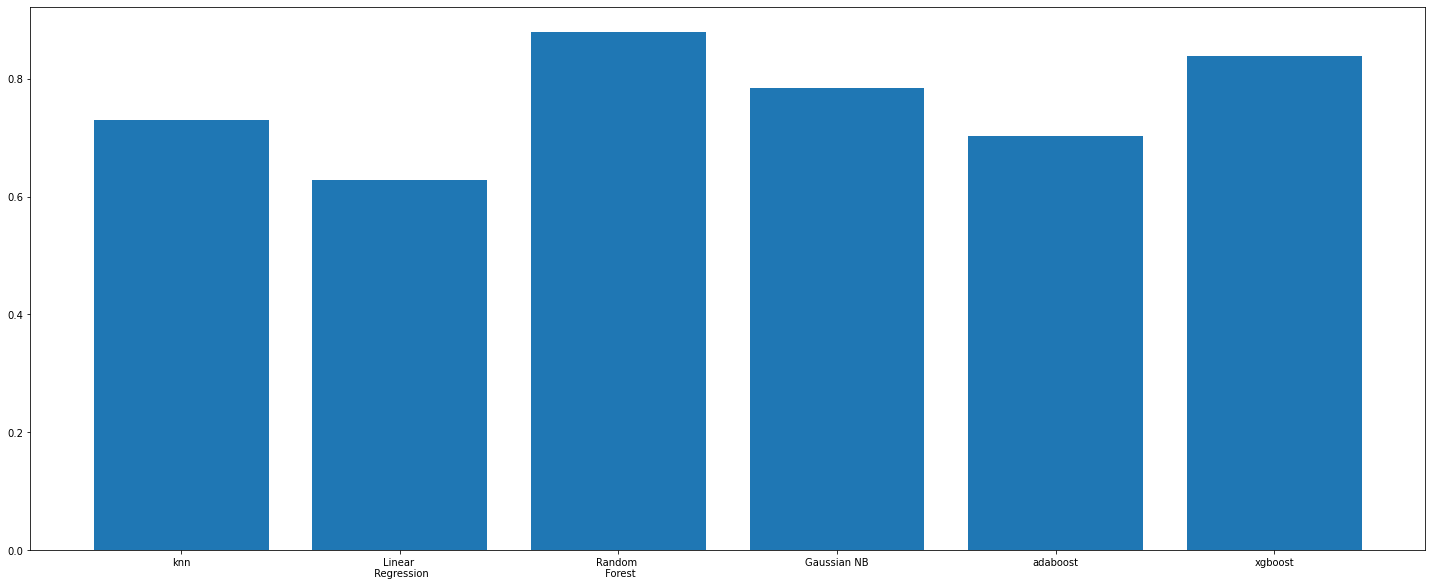

In [28]:

print(y_axis)
plt.figure(figsize=(25,10))
plt.bar(x_axis,y_axis)
plt.show()

We can see that the XGBoost algorithm got almost 87%, which is by it self not so bad.<br>
but now let's improve from this:

### ensambling:

#### the voting algorithm:
works by fitting both of our models and try to vote for right answer.
the soft parameter indicates that the outcome will be based of propability.
I put only two models becuase they are the only models that have a accuracy score of more then 85%, putting other model will do more harm then good.

In [29]:
from sklearn.ensemble import VotingClassifier

vt = VotingClassifier(
    [('xgb',xgb),
    ('rfc',rfc)],
    voting='soft'
)

vt.fit(x_train,y_train)
vt.score(x_validate,y_validate)



0.8378378378378378

#### the stacking classifier:
  the basic idea here is that we make 2 layer of fitting the data:
  1. the first layer contains the `Random forest` and `XGBoost`. we fit the data and the reasult of this will be fed into our second layer.
  2. the second layer consist of the `knn` model, and it will choose our final resualt

In [30]:
from sklearn.ensemble import StackingClassifier

st = StackingClassifier(
    estimators=[('rfc',rfc),
                ('xgb',xgb)],
                cv=5,
                final_estimator=knn
)
st.fit(x_train, y_train)
st.score(x_validate,y_validate)

0.8108108108108109

#### the bagging classifier:
  the basic idea here is that we sample the data into mupltiple training sets, train the model few times, and then using hard voting we can get our data.

In [31]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(rfc)
bg.fit(x_train, y_train)
bg.score(x_validate,y_validate)

0.8783783783783784

## Fine tuning
after we found our best model, let's use gridserch to find the vest hyperparameters

In [32]:
params = {
    "xgb__eta" : np.arange(0.01,0.2,0.01),
    "xgb__n_estimators" : [500,1000,3000],
    "rfc__max_depth" : [None,5,10,20],
    "rfc__n_estimators" :[5,10,100,200]
}

In [33]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(vt,params)

In [34]:
gs.fit(x_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8923767158108795
{'rfc__max_depth': 20, 'rfc__n_estimators': 5, 'xgb__eta': 0.01, 'xgb__n_estimators': 500}


## final Test

In [35]:
final_clf = vt.set_params(**gs.best_params_)
final_clf.fit(x_train,y_train)
final_clf.score(x_test,y_test)


0.91

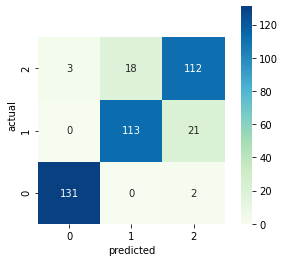

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(final_clf,x_test,y_test)
cm=confusion_matrix(y_test, pred)

axes=sns.heatmap(cm,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
axes.set_xlabel('predicted')
axes.set_ylim(0,3.5)
axes.set_ylabel('actual')

plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.86      0.84      0.85       134
           2       0.83      0.84      0.84       133

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



## conclusion


We can see the our fine tuned voting classifier got a score of 89%,which for a balanced data is quite good.
Out main strugle is with determine the Sync/Spontainous mode, we can see that for most of the time, we get the right preditcion, but in some cases we miss. The alone mode is very easy to find